# Zadanie domowe 7

In [122]:
from sklearn.cluster import KMeans
from pyclustering.cluster import kmedoids
from sklearn import metrics

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import numpy as np

from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = 25,17

import warnings

warnings.filterwarnings('ignore')

### Import danych

In [123]:
data = datasets.load_digits()
X = data.data
y = data.target

# Określenie liczby klastrów

Liczbę klastrów będę oceniał przy użyciu miar:
* Silhouette
* Daviesa - Bouldina
* Fowlkesa - Mallowsa

In [124]:
def audit_clustering(method, rng):
    result = {'sh': [],
             'db': [],
             'fm': []}
    for k in rng:
        m = method(n_clusters = k)
        m.fit(X)
        
        result['sh'].append(metrics.silhouette_score(X, m.labels_))
        result['db'].append(metrics.davies_bouldin_score(X, m.labels_))
        result['fm'].append(metrics.fowlkes_mallows_score(y, m.labels_))
        
    return result

In [125]:
means = audit_clustering(KMeans, np.arange(2, 15))

medoids = {'sh': [],
             'db': [],
             'fm': []}
for k in np.arange(2,15):
    km = kmedoids.kmedoids(X, np.random.choice(np.arange(X.shape[0]), size = k))
    km.process()
    clust = km.get_clusters()
    
    labels = np.arange(X.shape[0])
    for i,cl in enumerate(clust):
        labels[np.array(cl)] = i
    
    medoids['sh'].append(metrics.silhouette_score(X, labels))
    medoids['db'].append(metrics.davies_bouldin_score(X, labels))
    medoids['fm'].append(metrics.fowlkes_mallows_score(y, labels))

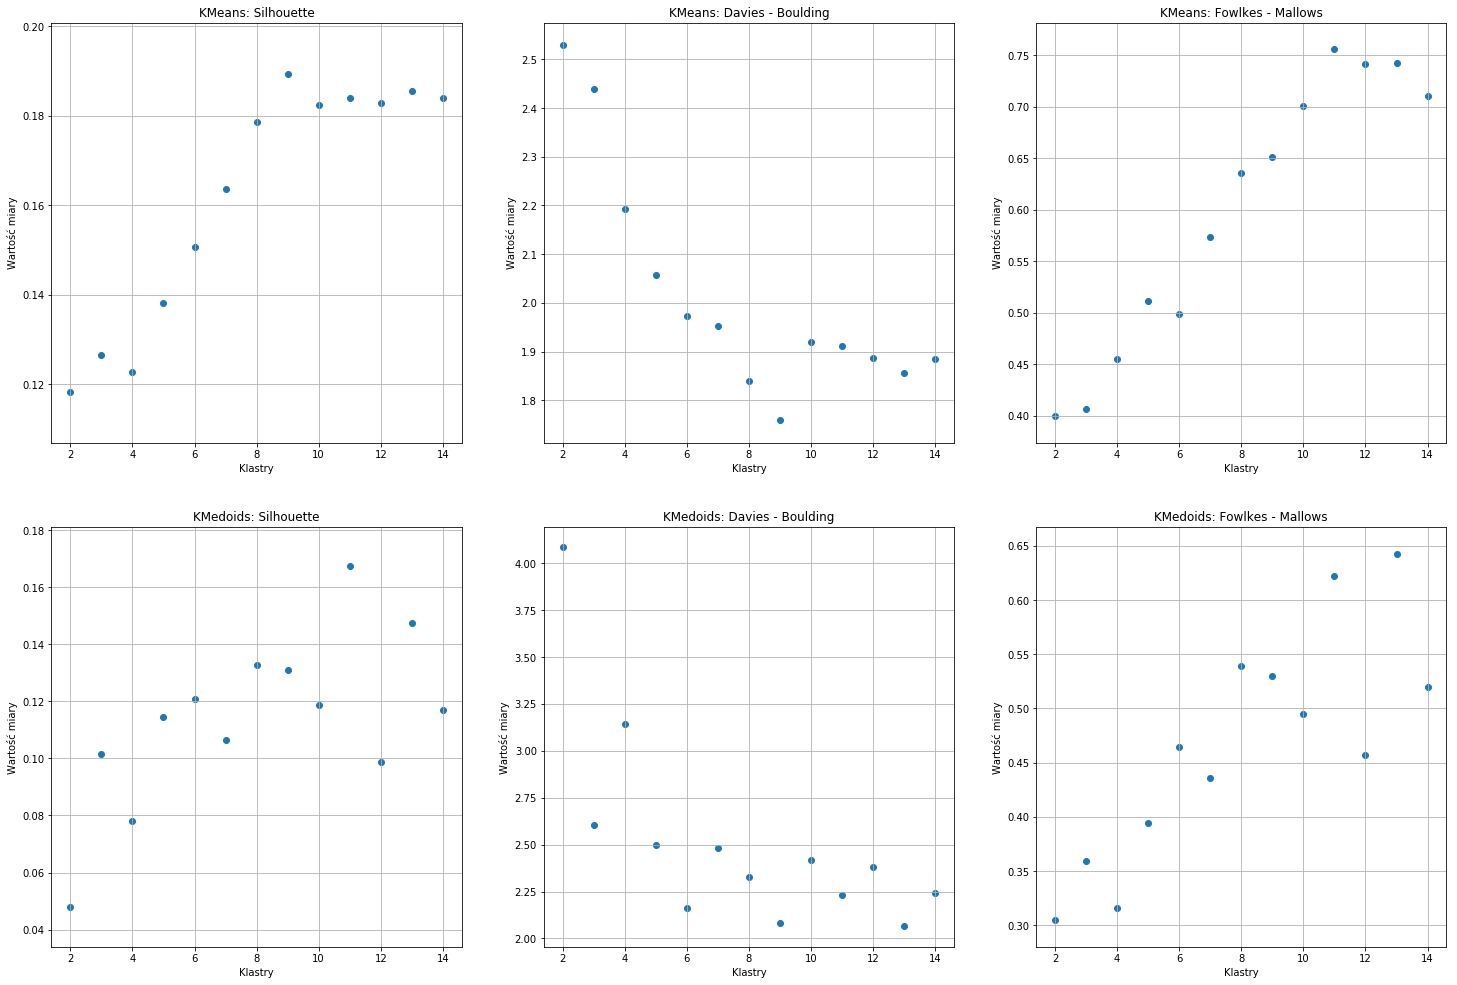

In [126]:
fig, ax = plt.subplots(2, 3)

ax[0][0].scatter(np.arange(2,15), means['sh'])
ax[0][0].title.set_text('KMeans: Silhouette')
ax[0][0].grid()
ax[0][0].set_xlabel('Klastry')
ax[0][0].set_ylabel('Wartość miary')
ax[0][1].scatter(np.arange(2,15), means['db'])
ax[0][1].title.set_text('KMeans: Davies - Boulding')
ax[0][1].grid()
ax[0][1].set_xlabel('Klastry')
ax[0][1].set_ylabel('Wartość miary')
ax[0][2].scatter(np.arange(2,15), means['fm'])
ax[0][2].grid()
ax[0][2].set_xlabel('Klastry')
ax[0][2].set_ylabel('Wartość miary')
ax[0][2].title.set_text('KMeans: Fowlkes - Mallows')

ax[1][0].scatter(np.arange(2,15), medoids['sh'])
ax[1][0].title.set_text('KMedoids: Silhouette')
ax[1][0].grid()
ax[1][0].set_xlabel('Klastry')
ax[1][0].set_ylabel('Wartość miary')
ax[1][1].scatter(np.arange(2,15), medoids['db'])
ax[1][1].title.set_text('KMedoids: Davies - Boulding')
ax[1][1].grid()
ax[1][1].set_xlabel('Klastry')
ax[1][1].set_ylabel('Wartość miary')
ax[1][2].scatter(np.arange(2,15), medoids['fm'])
ax[1][2].grid()
ax[1][2].set_xlabel('Klastry')
ax[1][2].set_ylabel('Wartość miary')
ax[1][2].title.set_text('KMedoids: Fowlkes - Mallows')
plt.show()

### Wnioski
* Jeśli chodzi o miarę **Silhouette** to zarówno **KMeans** jak i **KMedoids** sugerują istnienie $klastrów$ czyli tylu, ile jest w rzeczywistości.

* W mierze **Daviesa - Bouldina** pierwszy algorytm wypada najlepiej dla $9$, a drugi dla $10$ klastrów.

* W mierze **Fowlkesa - Mallowsa** pierwszy algorytm sugeruje istnienie $11$ klastrów, a drugi $10$

Algorytm **KMedoids** wypadł bardziej stablinie, jeśli chodzi o liczbe klastrów, ale **KMeans** również, uśredniając, wskazał poprawną liczbę klastrów.

### Wizualizacja

In [127]:
tsne = TSNE()
tsne.fit(X)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=None, verbose=0)

In [128]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

km = kmedoids.kmedoids(X, np.random.choice(np.arange(X.shape[0]), size = 10))
km.process()
clust = km.get_clusters()

labels = np.arange(X.shape[0])
for i,cl in enumerate(clust):
    labels[np.array(cl)] = i

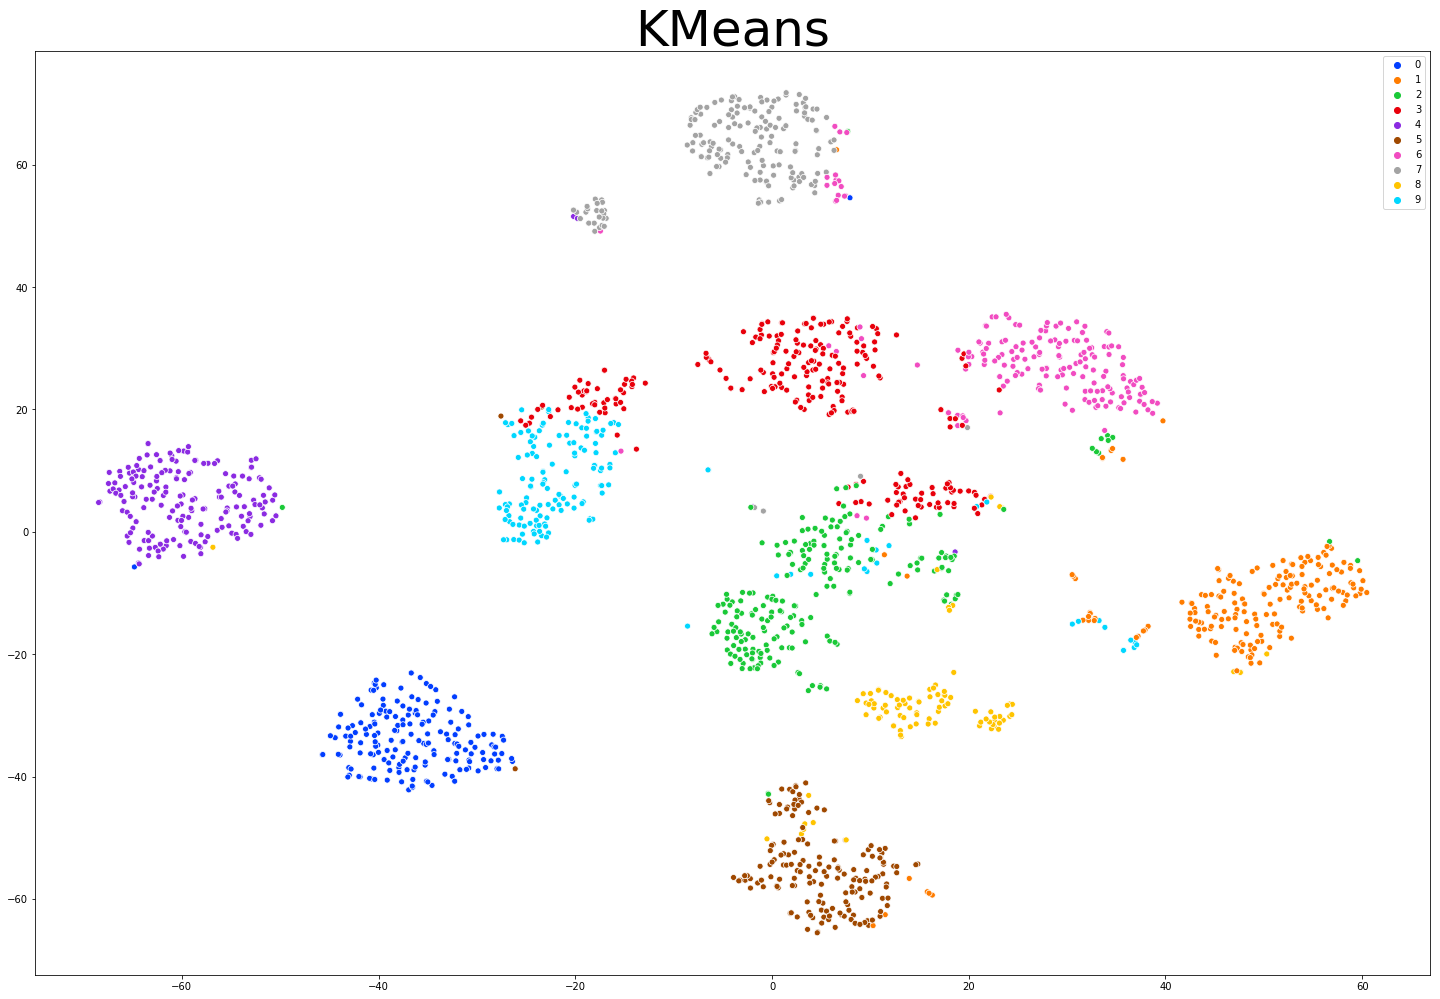

In [129]:
sns.scatterplot(*tsne.embedding_.T, kmeans.labels_, palette=sns.color_palette('bright',10))
plt.title('KMeans', fontsize=50)
plt.show()

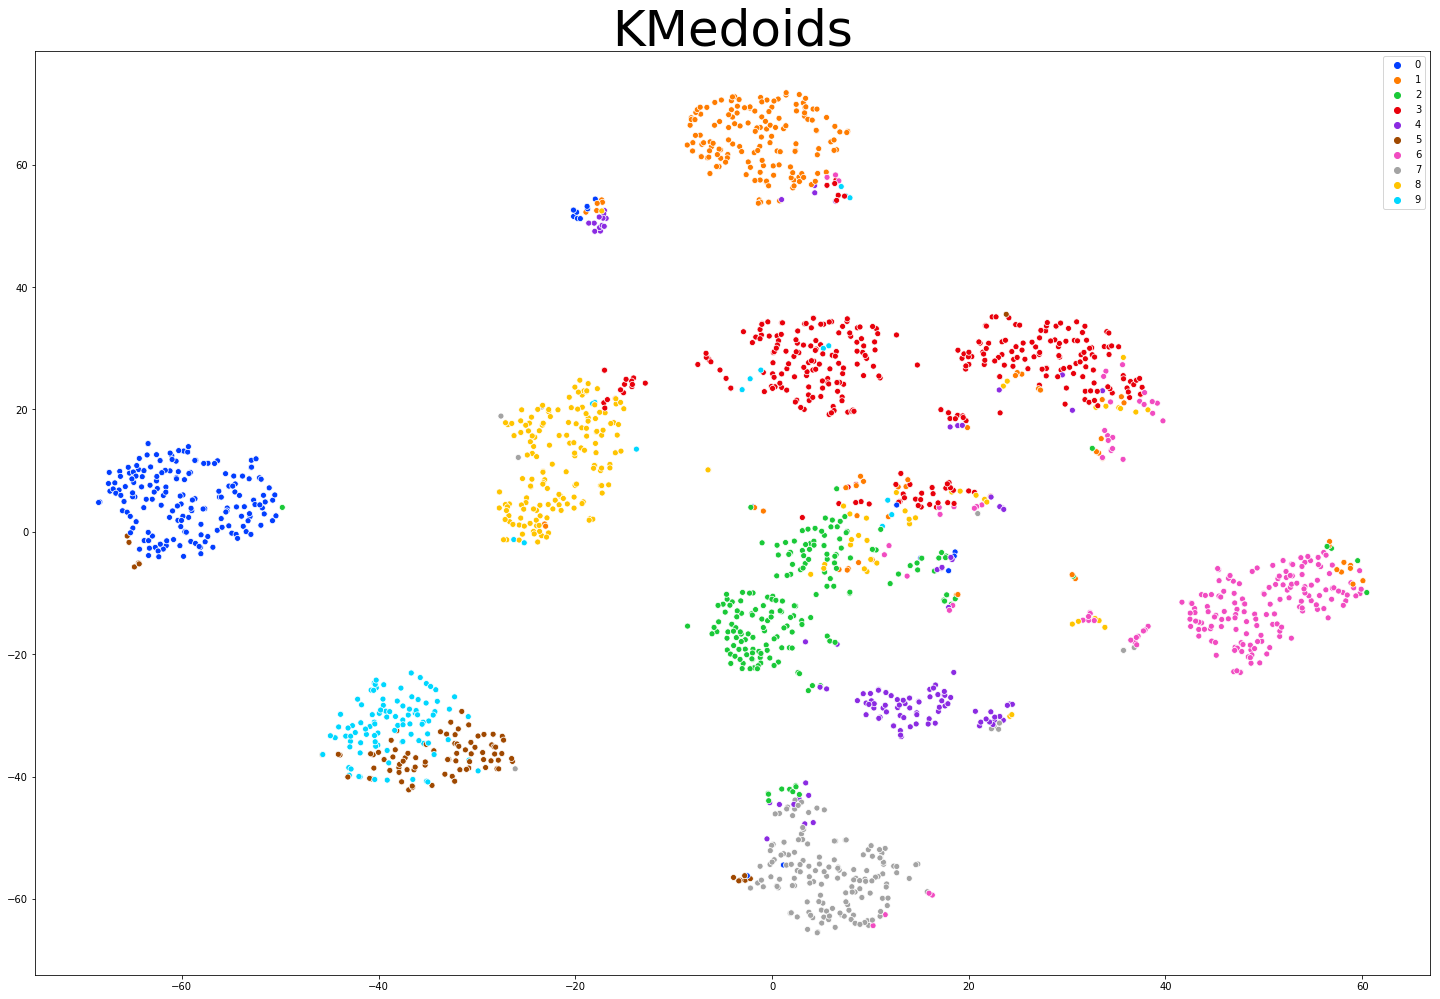

In [130]:
sns.scatterplot(*tsne.embedding_.T, labels, palette=sns.color_palette('bright',10))
plt.title('KMedoids', fontsize=50)
plt.show()

Oba algorytmy dokonały identycznego klastrowania.

### Wizualizacja centroidów

In [131]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [132]:
kmeans_centr = pca.transform(kmeans.cluster_centers_)
kmedoids_centr = pca.transform(X[km.get_medoids()])

centr = np.vstack((kmeans_centr, kmedoids_centr))

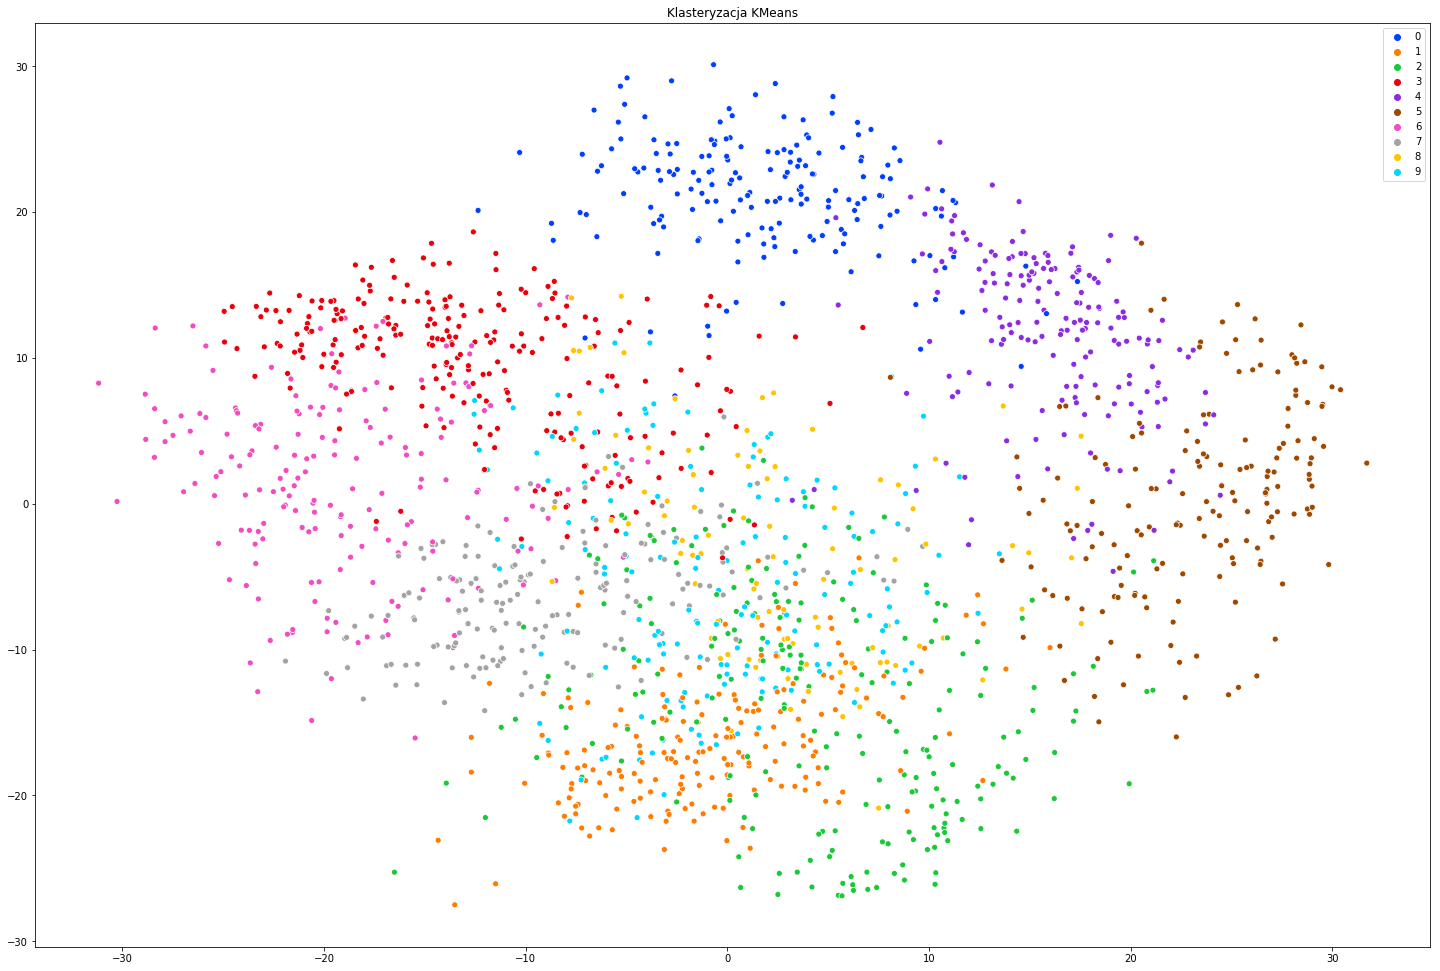

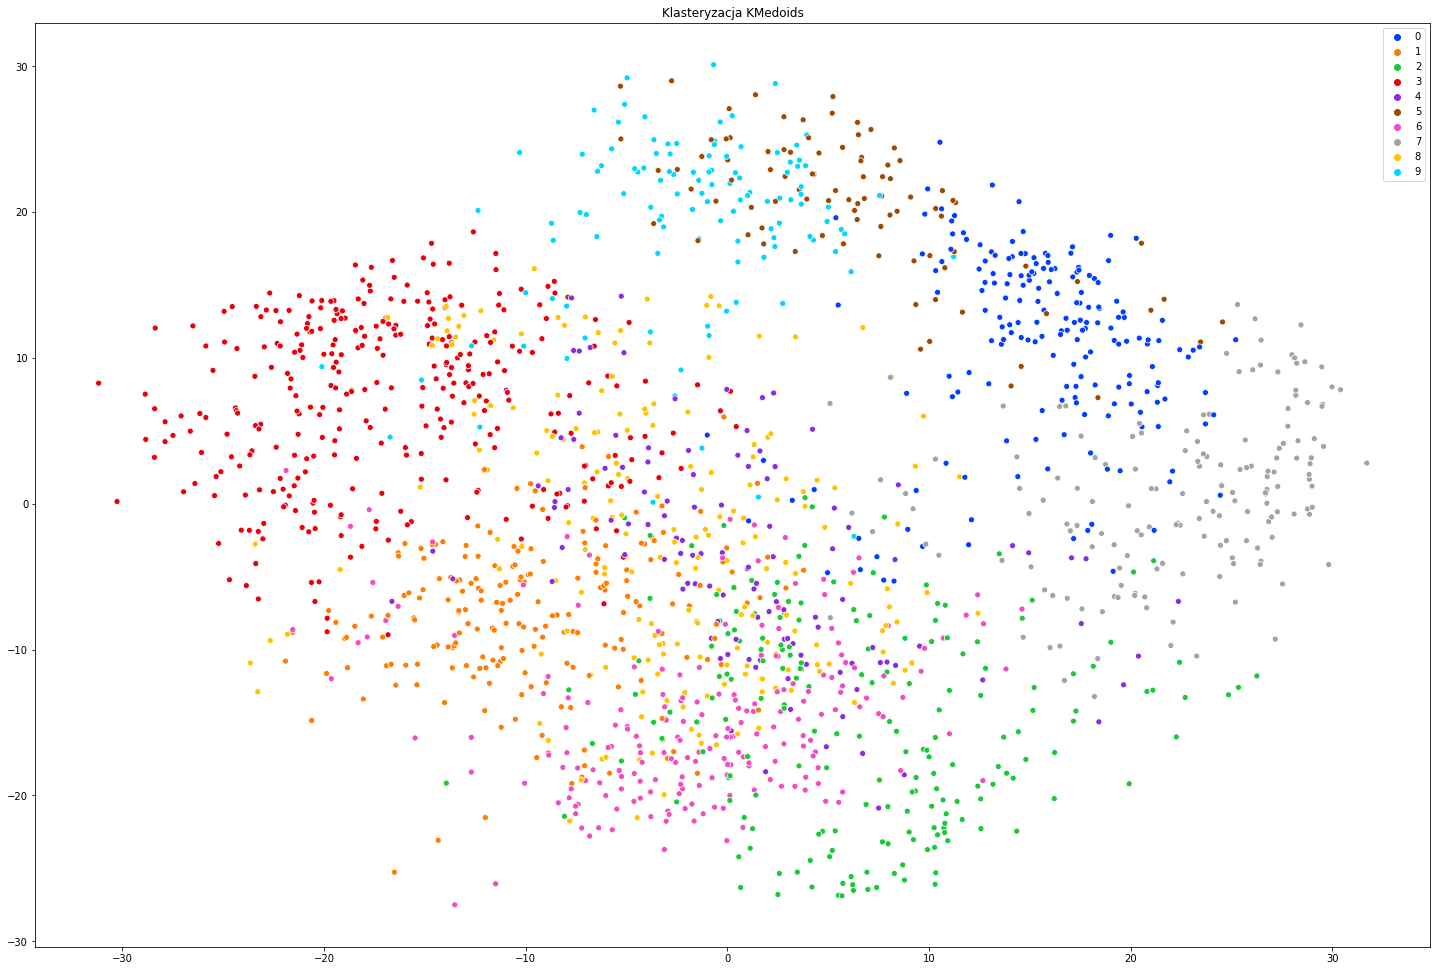

In [133]:
sns.scatterplot(*X_pca.T, kmeans.labels_, palette=sns.color_palette('bright',10))
plt.title('Klasteryzacja KMeans')
plt.show()

sns.scatterplot(*X_pca.T, labels, palette=sns.color_palette('bright',10))
plt.title('Klasteryzacja KMedoids')
plt.show()

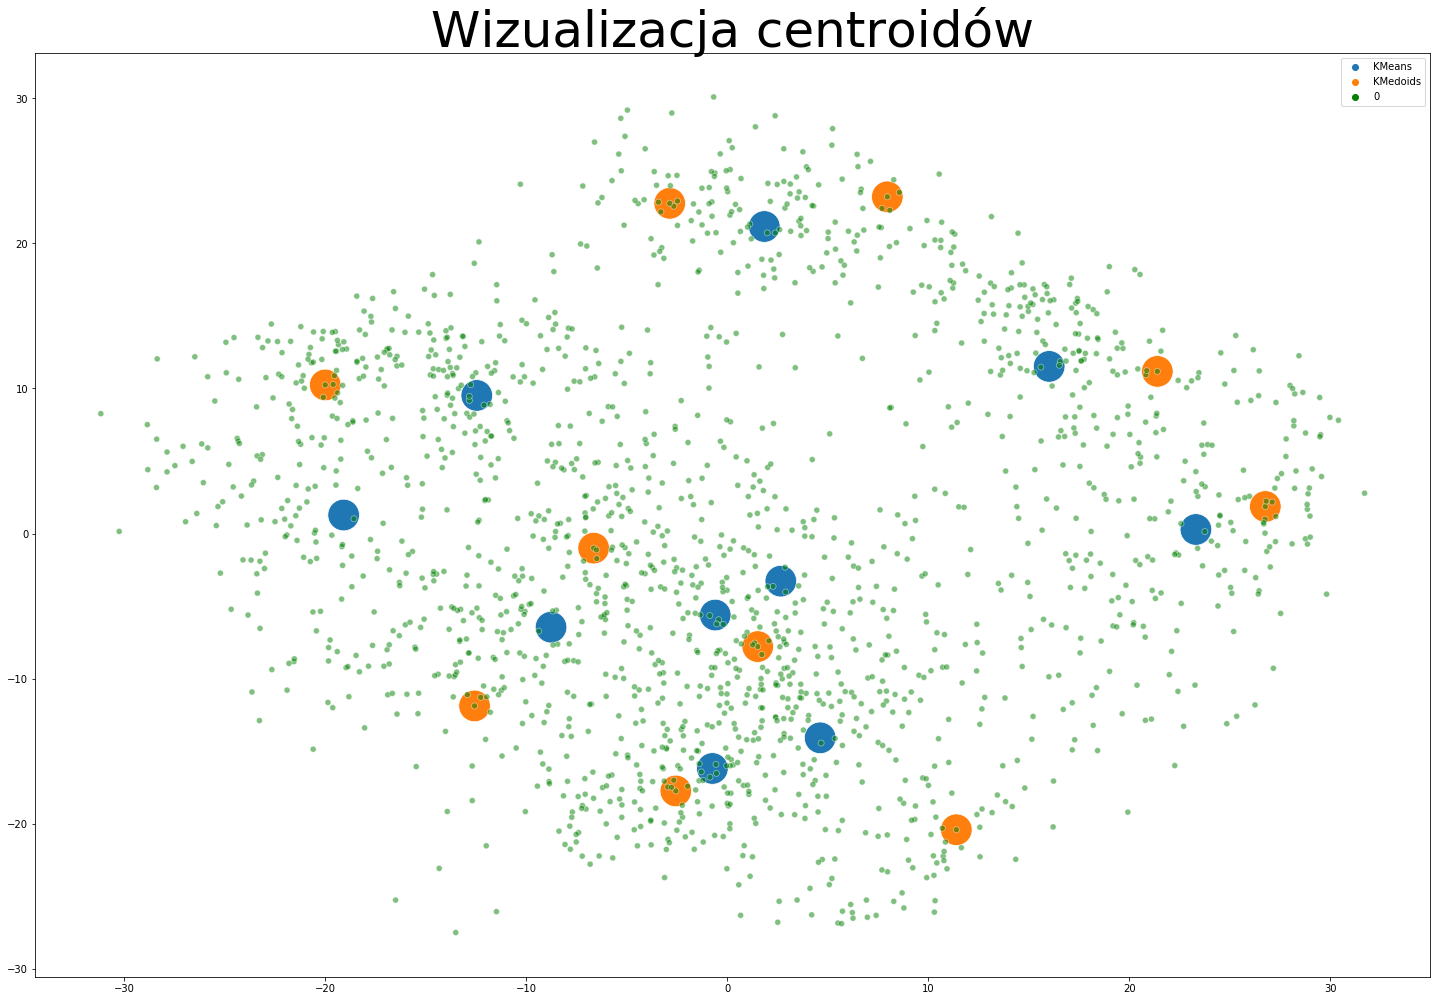

In [139]:
sns.scatterplot(*centr.T, s=1000, hue = np.hstack((np.repeat('KMeans',10), np.repeat('KMedoids',10))))
plt.title('Wizualizacja centroidów', fontsize=50)
sns.scatterplot(*X_pca.T, hue=0, palette={0: 'green'}, alpha=0.5)
plt.show()

Centroidy są różne w przypadku obu tych algorytmów, aczkolwiek leżą blisko siebie. Warto tutaj zauważyć, że pomimo niejasnego sparowania centroidów leżących w dolnej części wykresu, to klasteryzacja jest bardzo podobna. Jest to prawdopodobnie związane z rozbieżnością między średnią, a położenie punktów.

### Szybkość wykonania

In [135]:
kmean2 = KMeans(n_clusters=10)

%timeit kmean2.fit(X)

152 ms ± 7.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [136]:
km = kmedoids.kmedoids(X, np.random.choice(np.arange(X.shape[0]), size = 10))

%timeit km.process()

37.6 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Czas wykonania algorytmu **KMedoids** jest blisko czterokrotnie mniejszy od czasu wykonania algorytmu **KMeans**.